# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
mean = medical.charges.mean()
std = medical.charges.std()

In [6]:
print(mean)
print(std)

13270.422265141257
12110.011236693994


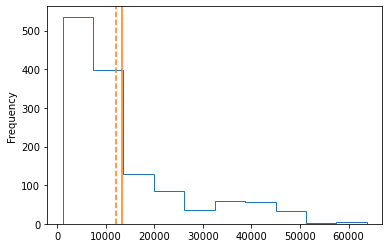

In [7]:
medical.charges.plot.hist(histtype = 'step')
plt.axvline(mean, c='C1')
plt.axvline(std, c='C1',linestyle='--')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: Population Mean for medical charges is 13270. As per Central Limit Theorem, the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30. The sample mean approaches population mean as we increase sample size. So there is no way the average charge drops below 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:Critical value is -1.96 and confidence intervals at 95% are 12729.960941, 14317.618075. There is no need for concern. It is a two-sided interval.

In [8]:
bootstrap = pd.DataFrame({'charge_mean': [medical.sample(30,replace=True).charges.mean() for i in range(30)]})

In [9]:
bootstrap.shape

(30, 1)

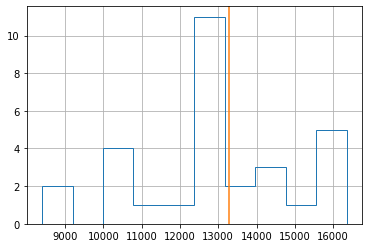

In [10]:
bootstrap.charge_mean.hist(histtype='step')
plt.axvline(medical.charges.mean(),color='C1')

In [11]:
sample_mean = np.mean(bootstrap)
sample_sigma = np.std(bootstrap)

In [12]:
confidence_level = 0.95

In [13]:
alpha = (1 - confidence_level) / 2
alpha

0.025000000000000022

In [14]:
critical_value = -1.96 #2.045 -1.96

In [15]:
standard_error = sample_sigma/np.sqrt(len(bootstrap))

In [16]:
marginof_error = standard_error * critical_value

In [17]:
confidence_interval = sample_mean + marginof_error, sample_mean - marginof_error

In [18]:
confidence_interval

(charge_mean    12206.884945
 dtype: float64,
 charge_mean    13665.187063
 dtype: float64)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

In [19]:
medic = medical.groupby('insuranceclaim')['charges'].mean()

In [20]:
medic

insuranceclaim
0     8821.421892
1    16423.928277
Name: charges, dtype: float64

__A:We assume that there is no difference in the mean for medical charges with or without insuranceclaim.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [21]:
s0 = pd.DataFrame({'charge_mean': [medical[medical.insuranceclaim == 0].sample(30,replace=True).charges.mean() for i in range(30)]})
n0 = len(s0)

In [22]:
s1 = pd.DataFrame({'charge_mean': [medical[medical.insuranceclaim == 1].sample(30,replace=True).charges.mean() for i in range(30)]})
n1 = len(s1)

In [23]:
s0_std = float(np.std(s0))
s0_mean = float(np.mean(s0))
s1_std = float(np.std(s1))
s1_mean = float(np.mean(s1))

In [24]:
s0_std

1133.452410415429

In [25]:
s1_std

2438.4598698140053

In [26]:
sp = np.sqrt((((n0-1)*s0_std*s0_std) + ((n1-1)*s1_std*s1_std))/(n0+n1-2))

In [27]:
sp

1901.420640385746

In [28]:
diff = (s0_mean - s1_mean)

In [29]:
t = diff/(sp * np.sqrt(1/n0 + 1/n1))

In [30]:
print('Manual t:', t)

Manual t: -16.369788005861277


tvalue from table is 2.2045, calculated t value (-16.369) is greater than table t value at alpha 0.05. The p-value is less than the alpha level: p <0.05. We can reject the null hypothesis that there is no difference between means.

In [31]:
degreesof_freedom = 1 - n0

table t - 2.2045

In [32]:
ttest_ind_from_stats(s0_mean, s0_std, n0, s1_mean, s1_std, n1)

Ttest_indResult(statistic=-16.369788005861274, pvalue=2.0730447418889942e-23)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test